# Setup librairies

In [749]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Sommaire

1. collect de donnée
2. netoyage et preparation des données
3. objectif de la prediction
4. selection de l’algo et du model
5. entrainement du modele
6. deploiement du modele
7. evaluation et enjeux


# Collect de donnée brut

In [750]:
# Load the dataset
file_path = './tomato_disease.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(10)

,Unnamed: 0,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,0,5.496714,54.630888,24.798711,63.891805,Diseased
1,1,4.861736,59.547083,23.849267,57.244071,Diseased
2,2,5.647689,43.007162,22.119261,55.909006,Healthy
3,3,6.523030,52.814846,20.706126,59.983128,Diseased
4,4,4.765847,46.746787,23.396447,59.149077,Diseased
5,5,4.765863,47.564373,22.786971,57.733860,Diseased
6,6,6.579213,47.038030,23.790386,63.481937,Diseased
7,7,5.767435,45.680046,23.270344,64.776526,Diseased
8,8,4.530526,50.242608,24.099105,60.442034,Diseased
9,9,5.542560,45.845249,20.929530,67.387650,Diseased


In [751]:
print(type(df))
len(df.columns)

<class 'pandas.core.frame.DataFrame'>


6

# Nettoyage et preparation des données

In [752]:
# Résumé des informations du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        500 non-null    int64  
 1   Leaf_Spot_Size    500 non-null    float64
 2   Leaf_Color_Index  500 non-null    float64
 3   Temperature       500 non-null    float64
 4   Humidity          500 non-null    float64
 5   Disease           500 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 23.6+ KB


## Nettoyage

In [753]:
# supprimer la premiere colonne de count
df = df.drop(df.columns[0], axis=1)

print(df.head())
len(df.columns)

   Leaf_Spot_Size  Leaf_Color_Index  Temperature   Humidity   Disease
0        5.496714         54.630888    24.798711  63.891805  Diseased
1        4.861736         59.547083    23.849267  57.244071  Diseased
2        5.647689         43.007162    22.119261  55.909006   Healthy
3        6.523030         52.814846    20.706126  59.983128  Diseased
4        4.765847         46.746787    23.396447  59.149077  Diseased


5

## Exploration

In [754]:
df.describe()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity
count,500.000000,500.000000,500.000000,500.000000
mean,5.006838,50.159131,22.216969,60.165940
std,0.981253,4.889986,2.020493,4.920331
min,1.758733,36.515567,16.207489,45.298057
25%,4.299693,47.023541,20.795141,56.940319
50%,5.012797,50.142658,22.239612,59.955433
75%,5.636783,53.256211,23.509477,63.498847
max,8.852731,63.161910,27.203366,75.965538


## transformation de données

### Imputation

In [755]:
# Vérifier si n'importe quelle colonne contient des valeurs manquantes
df.isnull().any()

Leaf_Spot_Size      False
Leaf_Color_Index    False
Temperature         False
Humidity            False
Disease             False
dtype: bool

Pas de cellules vide donc pas d'imputeur à utiliser

### Encoder

recheck label encoder (rediff sem6 part2 1:08)

In [756]:
# Label Encoding
# df['Disease'] = df['Disease'].map({'Diseased': 1, 'Healthy': 0})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

df.head()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,5.496714,54.630888,24.798711,63.891805,0
1,4.861736,59.547083,23.849267,57.244071,0
2,5.647689,43.007162,22.119261,55.909006,1
3,6.523030,52.814846,20.706126,59.983128,0
4,4.765847,46.746787,23.396447,59.149077,0


* pas besoin de discretiser des variables continue (regrouper par categorie des "range" de variable continue)
* pas besoin de créer des variable dérivées

### Normalisation

In [784]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
0,0.620906,0.864934,0.911604,0.841063,0.0
1,0.549179,0.942769,0.876703,0.753553,0.0
2,0.637960,0.680903,0.813107,0.735979,1.0
3,0.736838,0.836182,0.761160,0.789610,0.0
4,0.538348,0.740110,0.860057,0.778630,0.0


## Preparation des données

### Séparation features et label

Enlever la colonne Disease pour séparer "features" et "label" dans le train pour entrainer le model et on le met dans le test pour tester le model

In [758]:
y = df['Disease']
X = df.drop(['Disease'], axis=1)

In [759]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Disease, dtype: float64

In [760]:
X.head()

,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity
0,0.620906,0.864934,0.911604,0.841063
1,0.549179,0.942769,0.876703,0.753553
2,0.637960,0.680903,0.813107,0.735979
3,0.736838,0.836182,0.761160,0.789610
4,0.538348,0.740110,0.860057,0.778630


In [761]:
len(X.columns)

4

### train test split

In [762]:
from sklearn.model_selection import train_test_split

# je divise les données entre donnée d'entrainement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

il faudra peut etre enlever les colonnes qui font du bruit

# Objectif de la prediction

classification: predire si une plante de tomate est malade en fonction de différents parametre (taille et couleur de la feuille, temperature et humidité)

projet metier: permet de savoir si une plante tombe plus souvent malade suivant un climat en particulier (temperature et humidité)

# Selection de l'algorithme et du model

## Algorithme reg logistic

In [763]:

from sklearn.linear_model import LogisticRegression

modelReg = LogisticRegression(class_weight='balanced')
modelReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [764]:

# Récupérer les coefficients du modèle pour une régression simple avec une seule cible
coefficients = modelReg.coef_[0]

# Afficher les caractéristiques et leur coefficient
for feature, coef in zip(X_train.columns, coefficients):
    print(f'Feature: {feature}, Coefficient: {coef}')

print('-------------------------------')
# Normalisation des coefficients (optionnelle) pour avoir des valeurs entre 0 et 1
# Calculer la somme des coefficients absolus pour normalisation
normalized_importance = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Afficher les importances normalisées
for feature, norm_imp in zip(X_train.columns, normalized_importance):
    print(f'Feature: {feature}, Normalized Importance: {norm_imp}')

Feature: Leaf_Spot_Size, Coefficient: 3.0934582364882934
Feature: Leaf_Color_Index, Coefficient: -2.038168806426618
Feature: Temperature, Coefficient: 2.389685297996118
Feature: Humidity, Coefficient: -1.8813433628315526
-------------------------------
Feature: Leaf_Spot_Size, Normalized Importance: 0.32899835258851284
Feature: Leaf_Color_Index, Normalized Importance: 0.2167652278935787
Feature: Temperature, Normalized Importance: 0.2541500373181739
Feature: Humidity, Normalized Importance: 0.2000863821997346


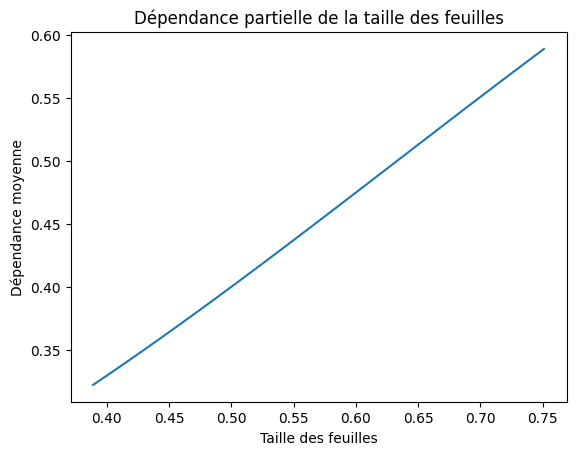

In [765]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

# Partial dependence plot pour la taille des feuilles
pdp_results = partial_dependence(modelReg, X_train, ['Leaf_Spot_Size'], grid_resolution=50)

# Tracer la courbe de dépendance partielle
plt.plot(pdp_results['grid_values'][0], pdp_results['average'][0])
plt.xlabel('Taille des feuilles')
plt.ylabel('Dépendance moyenne')
plt.title('Dépendance partielle de la taille des feuilles')
plt.show()


In [766]:

# Prédictions du modèle sur les données de test
y_pred = modelReg.predict(X_test)

from sklearn.metrics import accuracy_score

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [767]:
from sklearn.metrics import classification_report

# Afficher le rapport de classification (precision, recall, f1-score)
print(classification_report(y_test, y_pred, target_names=['Diseased', 'Healthy']))


              precision    recall  f1-score   support

    Diseased       0.95      0.74      0.83       216
     Healthy       0.32      0.76      0.45        34

    accuracy                           0.74       250
   macro avg       0.63      0.75      0.64       250
weighted avg       0.87      0.74      0.78       250



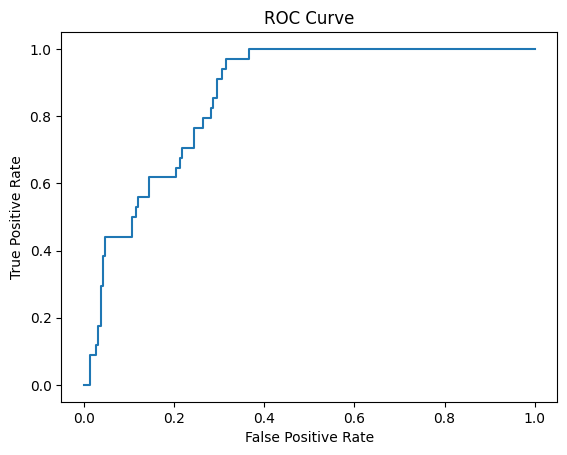

AUC: 0.86


In [768]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilités prédites par le modèle
y_prob = modelReg.predict_proba(X_test)[:, 1]

# Calcul et tracé de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calcul de l'AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")


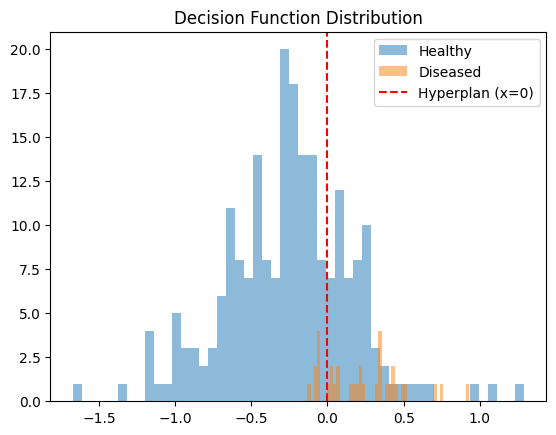

In [769]:
import numpy as np
import matplotlib.pyplot as plt

# Obtenir la fonction de décision
decision_values = modelReg.decision_function(X_test)

# Visualiser les valeurs de la fonction de décision
plt.hist(decision_values[y_test == 0], bins=50, alpha=0.5, label='Healthy')
plt.hist(decision_values[y_test == 1], bins=50, alpha=0.5, label='Diseased')
plt.axvline(x=0, color='red', linestyle='--', label='Hyperplan (x=0)')
plt.legend()
plt.title('Decision Function Distribution')
plt.show()


In [770]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Comparer avec un Random Forest
rf_model = RandomForestClassifier()
rf_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Si la performance n'est pas significativement meilleure, le modèle linéaire pourrait suffire
print(f"Random Forest Accuracy: {rf_score.mean():.2f}")


Random Forest Accuracy: 0.98


## Algorithme SVC

In [771]:
from sklearn.svm import SVC

# Créer un modèle SVM avec un noyau linéaire
modelSVM = SVC(kernel='linear', random_state=42, class_weight='balanced')

# Entraîner le modèle
modelSVM.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = modelSVM.predict(X_test)

In [772]:
from sklearn.metrics import accuracy_score, classification_report

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Afficher un rapport détaillé sur la classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7360

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       216
         1.0       0.31      0.79      0.45        34

    accuracy                           0.74       250
   macro avg       0.64      0.76      0.64       250
weighted avg       0.87      0.74      0.78       250



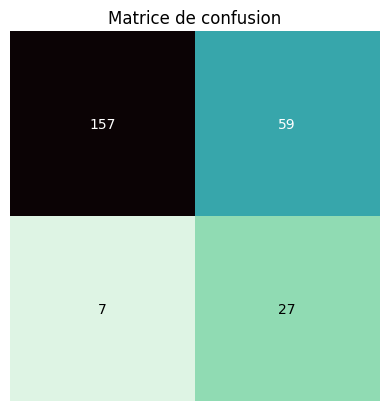

In [773]:
from sklearn.metrics import confusion_matrix
from seaborn import color_palette

cf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{cf_matrix}")

fig, ax = plt.subplots()
im = ax.imshow(cf_matrix,cmap='mako_r')
for i in range(len(cf_matrix)):
    for j in range(len(cf_matrix[i])):
        col = 'white'
        if cf_matrix[i,j]<(cf_matrix.max()/4):
            col = 'black'
        ax.text(j, i, cf_matrix[i, j],ha="center", va="center", color=col)
ax.set_title("Matrice de confusion")
plt.axis('off')
plt.show()


## Model RandomForestClassifier

In [774]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle
modelRFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
modelRFC.fit(X_train, y_train)

# Prédiction
y_pred = modelRFC.predict(X_test)


### importance et SHAP

In [775]:

importances = modelRFC.feature_importances_

# Afficher les importances des variables
for i, feature in enumerate(feature_names):
    print(f'Feature: {feature}, Importance: {importances[i]}')

Feature: taille_feuilles, Importance: 0.2319905093717305
Feature: couleur, Importance: 0.2227114503305343
Feature: temperature, Importance: 0.2727197008184191
Feature: humidite, Importance: 0.27257833947931615


In [776]:
# Vérifie si température et humidité ont des contributions faibles ou sont corrélées entre elles (c'est-à-dire si elles ont un impact similaire sur la prédiction, ce qui peut les rendre moins visibles individuellement dans le plot). Il peut être utile de regarder la corrélation entre ces deux variables et d'autres caractéristiques.

df.corr()  # Affiche la matrice de corrélation des variables


,Leaf_Spot_Size,Leaf_Color_Index,Temperature,Humidity,Disease
Leaf_Spot_Size,1.000000,-0.075671,-0.057791,0.064140,0.252198
Leaf_Color_Index,-0.075671,1.000000,0.076038,-0.021578,-0.223731
Temperature,-0.057791,0.076038,1.000000,-0.022057,0.153951
Humidity,0.064140,-0.021578,-0.022057,1.000000,-0.193709
Disease,0.252198,-0.223731,0.153951,-0.193709,1.000000


In [785]:
# Il est également possible que certaines caractéristiques n'aient pas de variance suffisante ou qu'elles ne soient pas assez présentes dans les données. Par exemple, si "humidité" a des valeurs quasi-constantes ou si elle est très peu diversifiée dans le jeu de données, son impact pourrait être faible et ne pas apparaître dans les plots SHAP.

df.var()  # Vérifie la variance de chaque caractéristique

Leaf_Spot_Size      0.012286
Leaf_Color_Index    0.005994
Temperature         0.005517
Humidity            0.004195
Disease             0.111840
dtype: float64

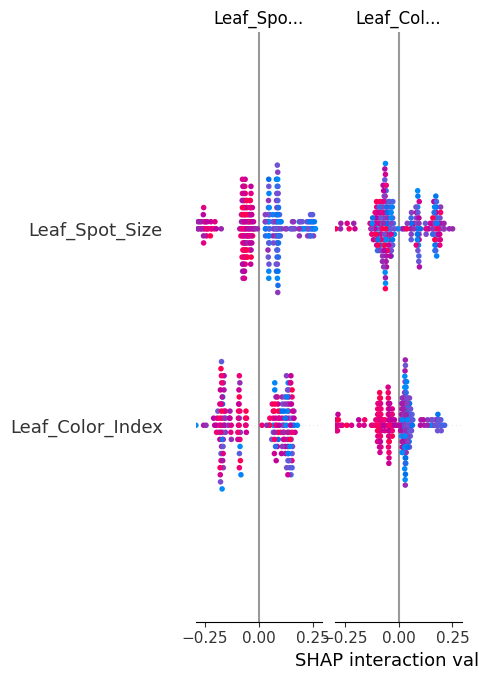

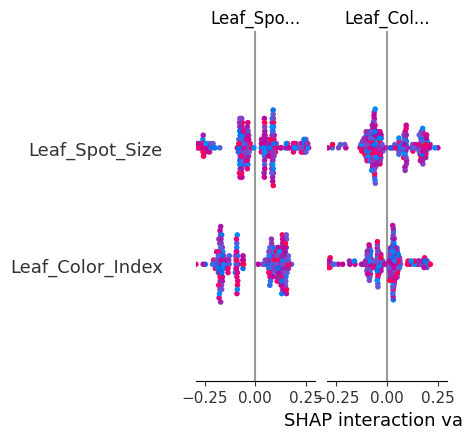

In [ ]:
import shap

# Calcul des valeurs SHAP sur les mêmes données utilisées pour entraîner le modèle
explainer = shap.TreeExplainer(modelRFC)
shap_values = explainer.shap_values(X_train) 
shap.summary_plot(shap_values, X_train)

### Precision

In [778]:
from sklearn.metrics import accuracy_score, classification_report

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Afficher un rapport détaillé sur la classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9800

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       216
         1.0       1.00      0.85      0.92        34

    accuracy                           0.98       250
   macro avg       0.99      0.93      0.95       250
weighted avg       0.98      0.98      0.98       250



### Details erreur du model avec matrice de confusion

Pour visualiser les erreurs de classification et voir quelles classes sont souvent confondues. Utile pour les problèmes multiclasse.

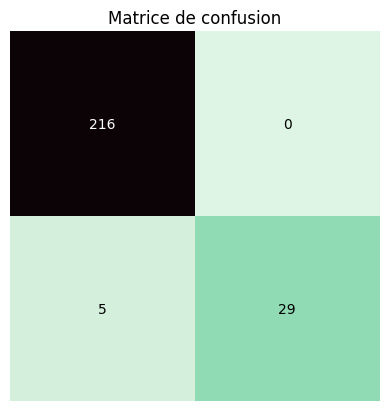

In [779]:
from sklearn.metrics import confusion_matrix
from seaborn import color_palette

cf_matrix = confusion_matrix(y_test, y_pred)
# print(f"Confusion Matrix: \n{cf_matrix}")

fig, ax = plt.subplots()
im = ax.imshow(cf_matrix,cmap='mako_r')
for i in range(len(cf_matrix)):
    for j in range(len(cf_matrix[i])):
        col = 'white'
        if cf_matrix[i,j]<(cf_matrix.max()/4):
            col = 'black'
        ax.text(j, i, cf_matrix[i, j],ha="center", va="center", color=col)
ax.set_title("Matrice de confusion")
plt.axis('off')
plt.show()


### ROC

In [780]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9264705882352942


### Los

In [781]:
# j'ai des etiquette de classe et pas des probabilité de predictions

from sklearn.metrics import log_loss

log_loss_value = log_loss(y_test, y_pred)
print(f"Log Loss: {log_loss_value}")


Log Loss: 0.7208730677823433


### Classification report

In [782]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred, digits=4))


              precision    recall  f1-score   support

         0.0     0.8869    0.8909    0.8889       220
         1.0     0.1724    0.1667    0.1695        30

    accuracy                         0.8040       250
   macro avg     0.5296    0.5288    0.5292       250
weighted avg     0.8011    0.8040    0.8026       250

